# Spectral Estimation of Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## The Welch Method

In the previous section it has been shown that the [periodogram](periodogram.ipynb) as a non-parametric estimator of the power spectral density (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of a random signal $x[k]$ is not consistent. This is due to the fact that its variance does not converge towards zero even when the length of the random signal is increased towards infinity. In order to overcome this problem, the [Bartlett method](https://en.wikipedia.org/wiki/Bartlett's_method) and [Welch method](https://en.wikipedia.org/wiki/Welch's_method) 

1. split the random signal into segments, 
2. estimate the PSD for each segment, and 
3. average over these local estimates. 

The averaging reduces the variance of the estimated PSD. While Barlett's method uses non-overlapping segments, Welch's is a generalization using windowed overlapping segments. For the discussion of Welch's method we assume a wide-sense ergodic real-valued random process.

### Derivation

The random signal $x[k]$ is split into into $L$ overlapping segments of length $N$, starting at multiples of the step size $M \in {1,2, \dots, N}$. These segments are windowed by the window $w[k]$ of length $N$, resulting in a windowed $l$-th segment $x_l[k]$ with $0\leq l\leq L-1$. The discrete-time Fourier transformation (DTFT) $X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of the windowed $l$-th segment is then given as 

\begin{equation}
X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k = 0}^{N-1} x[k + l \cdot M] \, w[k] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,k}
\end{equation}

where the window $w[k]$ defined within $0\leq k\leq N-1$ should be normalized as $\frac{1}{N} \sum\limits_{k=0}^{N-1} | w[k] |^2 = 1$. The latter condition ensures that the power of the signal is maintained in the estimate. The stepsize $M$ determines the overlap between the segments. In general, $N-M$ number of samples overlap between adjacent segments. For $M = N$ no overlap occurs. The overlap is sometimes given as ratio $\frac{N-M}{N}\cdot 100\%$. 

Introducing $X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ into the definition of the periodogram yields the periodogram of the $l$-th segment

\begin{equation}
\hat{\Phi}_{xx,l}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{N} \,| X_l(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2
\end{equation}

The estimated PSD is then given by averaging over the segment's periodograms $\hat{\Phi}_{xx,l}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ 

\begin{equation}
\hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{L} \sum_{l = 0}^{L-1} \hat{\Phi}_{xx,l}(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{equation}

Note, that the total number $L$ of segments has to be chosen such that the last required sample $(L-1)\cdot M + N - 1$ does not exceed the total length of the random signal. Otherwise the last segment $x_{L-1}[k]$ may be zeropadded towards length $N$.

The Bartlett method uses a rectangular window $w[k] = \text{rect}_N[k]$ and non-overlapping segments $M=N$. The Welch method uses overlapping segments and a window that must be chosen according to the intended spectral analysis task.

### Example

The following example is equivalent to the previous [periodogram example](periodogram.ipynb#Example---Periodogram). We aim at estimating the PSD of a random process which draws samples from normally distributed white noise with zero-mean and unit variance. The true PSD is consequently given as $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 1$.

Mean value of the periodogram: 0.988585


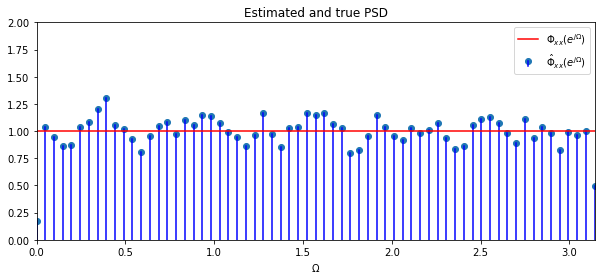

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

N = 128  # length of segment
M = 64  # stepsize
L = 100  # total number of segments

# generate random signal
np.random.seed(5)
x = np.random.normal(size=L*M)

# compute periodogram by Welch's method
nf, Pxx = sig.welch(x, window='hamming', nperseg=N, noverlap=(N-M))
Pxx = .5*Pxx  # due to normalization in scipy.signal
Om = 2*np.pi*nf

# plot results
plt.figure(figsize=(10,4))
plt.stem(Om, Pxx, 'b', label=r'$\hat{\Phi}_{xx}(e^{j \Omega})$', basefmt=' ')
plt.plot(Om, np.ones_like(Pxx), 'r', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Estimated and true PSD')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 2])
plt.legend()

# compute mean value of the periodogram
print('Mean value of the periodogram: %f' %np.mean(np.abs(Pxx)))

**Exercise**

* Compare the results to the periodogram example. Is the variance of the estimator lower?
* Change the number of segments `L`. What changes?
* Change the segment length `N` and stepsize `M`. What changes?

Solution: When comparing both the estimates of the PSD in the previous periodogram and above example, it is obvious that the variance of the Welch estimator is lower. Increasing the number of segments `L` lowers the variance further. Increasing the segment length `N` increases the total number of discrete frequencies in the estimated PSD. Since in above example the total number of segments is kept constant, the variance increases. Lowering the stepsize `M` has the same result, since the total number of samples is reduced for a fixed number of segments.

### Evaluation

It is shown in [[Stoica et al.](../index.ipynb#Literature)] that Welch's method is asymptotically unbiased. Under the assumption of a wide-sense stationary (WSS) random process, the periodograms $\hat{\Phi}_{xx,l}(e^{j \Omega})$ of the segments can be assumed to be approximately uncorrelated. Hence, averaging over these reduces the overall variance of the estimator. It can be shown formally that in the limiting case of an infinitely number of segments (infintely long signal) the variance tends towards zero. As a result Welch's method is an asymptotically consistent estimator of the PSD. 

Note, that for a finite segment length $N$ the properties of the estimated PSD $\hat{\Phi}_{xx}(e^{j \Omega})$ depend on the length $N$ of the segments and the window function $w[k]$ due to the [leakage effect](../spectral_analysis_deterministic_signals/leakage_effect.ipynb).

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2018*.